In [11]:
from torch.distributions.uniform import Uniform
import numpy as np
import matplotlib.pyplot as plt

torch.Size([500, 2])


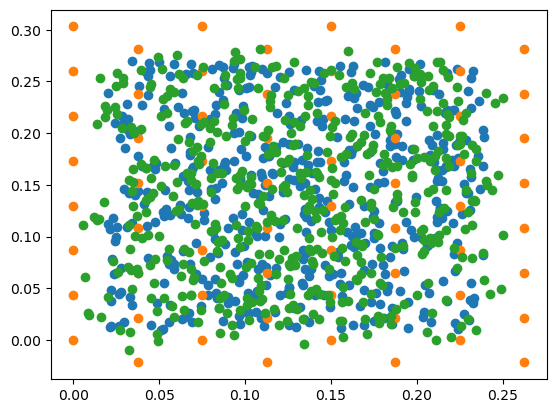

In [55]:
robot_positions = torch.zeros((8,8,2))
for i in range(8):
    for j in range(8):
        if i%2!=0:
            finger_pos = torch.tensor((i*0.0375, j*0.043301 - 0.02165))
        else:
            finger_pos = torch.tensor((i*0.0375, j*0.043301))
        robot_positions[i,j] = finger_pos

dim = 500
a = torch.zeros((dim)).uniform_(0.02, 0.24)
b = torch.zeros((dim)).uniform_(0.008, 0.27)
c = torch.stack((a,b), axis=-1)
d = c + torch.zeros((dim, 2)).uniform_(-0.02, 0.02)
print(c.shape)
plt.scatter(c[:,0], c[:, 1])
plt.scatter(robot_positions[:,:,0], robot_positions[:,:,1])
plt.scatter(d[:,0], d[:, 1])

In [69]:
num_agents = 1
bs = 128
n_samples=512
top_k = 1

x_bounds = np.array([[-6.0, 6.0]] * num_agents)
y_bounds = np.array([[-6.0, 6.0]] * num_agents)

x_samples = np.random.uniform(x_bounds[:, 0][:, np.newaxis], x_bounds[:, 1][:, np.newaxis], (n_samples, num_agents, 1))
y_samples = np.random.uniform(y_bounds[:, 0][:, np.newaxis], y_bounds[:, 1][:, np.newaxis], (n_samples, num_agents, 1))
samples = np.concatenate((x_samples, y_samples), axis=2)
print(samples.shape)

q_values = np.random.rand(bs, 1)

top_indices = np.argpartition(q_values, top_k, axis=0)[:top_k] # Since our rewards are negative, we can use this logic.
top_samples = samples[top_indices, np.arange(num_agents)][0]

for agent in range(num_agents):
    print(top_samples.shape)
    agent_top_samples = top_samples[:, agent, :]  # Shape: (top_k, 2)

(512, 1, 2)
(1, 2)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed